<a href="https://colab.research.google.com/github/wcrowley342/LogisticRegression/blob/main/LeadScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library & Data Import

In [91]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import and read in the data
leads = pd.read_csv('https://raw.githubusercontent.com/wcrowley342/LogisticRegression/main/Lead%20Source%20Dataset%20V14.csv')

#show first five rows
leads.head()

,ID,State,PhoneNumber,WebsiteVisits,CompanySize,EmailOpens,EmailClicks,LeadSource,Customer
0,7545550,Ohio,2-660-823-2444,10,106,14,7,Webinar,No
1,3824383,Colorado,5-484-700-5755,15,51,26,8,Print,Yes
2,6263389,Pennsylvania,6-554-705-2850,14,142,10,9,Adwords,No
3,4625163,Wyoming,6-468-186-1647,6,136,19,4,Print,No
4,1348223,Maryland,2-645-088-3657,5,137,14,6,Print,No


# EDA

In [92]:
#understanding our data with .info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             800 non-null    int64 
 1   State          800 non-null    object
 2   PhoneNumber    800 non-null    object
 3   WebsiteVisits  800 non-null    int64 
 4   CompanySize    800 non-null    int64 
 5   EmailOpens     800 non-null    int64 
 6   EmailClicks    800 non-null    int64 
 7   LeadSource     800 non-null    object
 8   Customer       800 non-null    object
dtypes: int64(5), object(4)
memory usage: 56.4+ KB


In [93]:
leads.describe()

,ID,WebsiteVisits,CompanySize,EmailOpens,EmailClicks
count,8.000000e+02,800.000000,800.000000,800.000000,800.000000
mean,4.829681e+06,11.088750,104.391250,11.477500,5.251250
std,2.948017e+06,6.312344,25.603517,6.238842,3.353309
min,5.948000e+03,2.000000,50.000000,2.000000,0.000000
25%,2.280152e+06,6.000000,85.000000,6.000000,3.000000
50%,4.686133e+06,11.000000,103.000000,11.000000,5.000000
75%,7.402104e+06,15.000000,125.000000,16.000000,7.000000
max,9.975718e+06,29.000000,149.000000,29.000000,14.000000


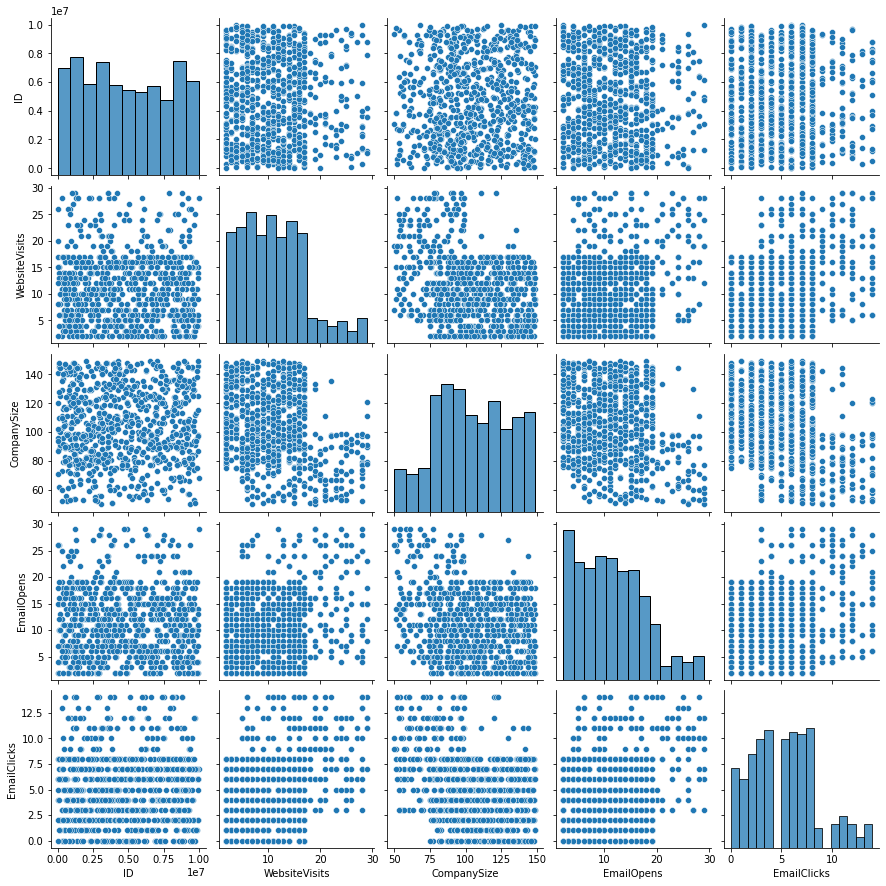

In [94]:
sns.pairplot(leads)

In [95]:
#grouping and summarizing data
print(leads.groupby(['Customer']).mean())

                    ID  WebsiteVisits  CompanySize  EmailOpens  EmailClicks
Customer                                                                   
No        4.858848e+06       9.136667   113.083333   10.156667     4.156667
Yes       4.742178e+06      16.945000    78.315000   15.440000     8.535000


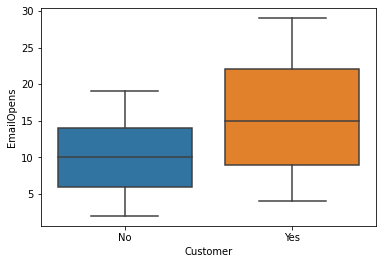

In [96]:
#look at difference in customers vs non via boxplots
sns.boxplot(x = 'Customer', y = 'EmailOpens', data = leads)

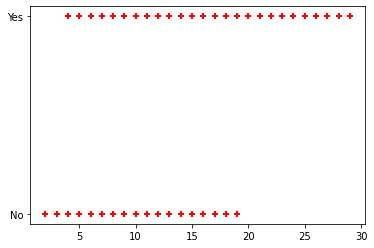

In [97]:
#scatterplot of emailopens
plt.scatter(leads.EmailOpens, leads.Customer,marker='+',color='red')

In [98]:
leads.groupby(["State", "Customer"])["ID"].count()

State           Customer
Colorado        No          55
                Yes          4
Connecticut     No          29
                Yes         26
Delaware        No          23
                Yes         32
Georgia         No          31
                Yes          1
Illinois        No          61
                Yes          4
Indiana         No          12
                Yes          5
Maryland        No          25
                Yes         21
Montana         No          80
                Yes         13
New Jersey      No          20
                Yes         27
New York        No          18
                Yes         11
North Carolina  No          56
                Yes          9
Ohio            No          28
                Yes          8
Oregon          No          60
                Yes          9
Pennsylvania    No          27
                Yes         17
Vermont         No          56
                Yes          9
Virginia        No          15
              

In [99]:
leads.groupby(["LeadSource", "Customer"])["ID"].count()

LeadSource  Customer
Adwords     No           98
            Yes          58
Print       No          210
            Yes          48
Tradeshow   No          190
            Yes          34
Webinar     No          102
            Yes          60
Name: ID, dtype: int64

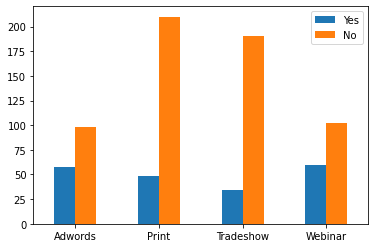

In [100]:
Yes = [58, 48, 34, 60]
No = [98, 210, 190, 102]
index = ['Adwords', 'Print', 'Tradeshow', 'Webinar']
df = pd.DataFrame({'Yes': Yes,
                   'No': No}, index=index)
ax = df.plot.bar(rot=0, stacked=False)

In [101]:
#imbalanced class?

leads['Customer'].value_counts()

No     600
Yes    200
Name: Customer, dtype: int64

(array([126., 145., 125.,  95., 131.,  90.,  19.,  24.,  23.,  22.]),
 array([ 2. ,  4.7,  7.4, 10.1, 12.8, 15.5, 18.2, 20.9, 23.6, 26.3, 29. ]),
 <a list of 10 Patch objects>)

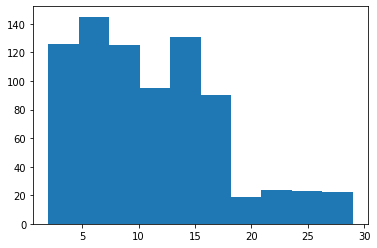

In [102]:
#hist of variables
plt.hist(leads.WebsiteVisits)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


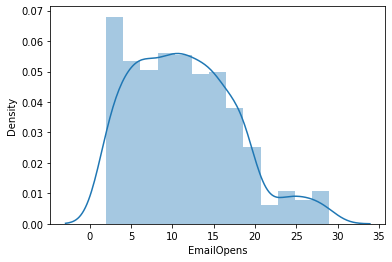

In [103]:
#hist of variables
sns.distplot(leads['EmailOpens'])
plt.show()

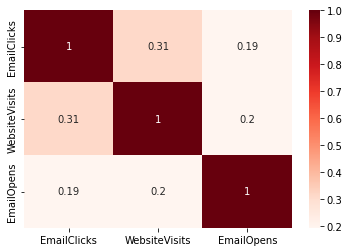

In [104]:
# Creating a matrix using age, salry, balance as rows and columns
#leads[['WebsiteVisits','CompanySize','EmailOpens']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(leads[['EmailClicks', 'WebsiteVisits', 'EmailOpens']].corr(), annot=True, cmap = 'Reds')
plt.show()

# Data Cleanup / Prep / Preprocessing

In [105]:
#ensure no duplicate rows exist
duplicateRowsDF = leads[leads.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [ID, State, PhoneNumber, WebsiteVisits, CompanySize, EmailOpens, EmailClicks, LeadSource, Customer]
Index: []


In [106]:
#columns with text - like State - are usually objects
#int64 and float64 are numeric
leads.dtypes

ID                int64
State            object
PhoneNumber      object
WebsiteVisits     int64
CompanySize       int64
EmailOpens        int64
EmailClicks       int64
LeadSource       object
Customer         object
dtype: object

In [107]:
#dropping phone number & ID
leads= leads.drop(['PhoneNumber', 'ID'], axis=1)
leads.head()

,State,WebsiteVisits,CompanySize,EmailOpens,EmailClicks,LeadSource,Customer
0,Ohio,10,106,14,7,Webinar,No
1,Colorado,15,51,26,8,Print,Yes
2,Pennsylvania,14,142,10,9,Adwords,No
3,Wyoming,6,136,19,4,Print,No
4,Maryland,5,137,14,6,Print,No


In [108]:
#creating new column - EmailScore
leads['EmailScore'] = leads.loc[:,['EmailClicks','EmailOpens']].sum(axis=1)
leads= leads.drop('EmailOpens', axis=1)
leads= leads.drop('EmailClicks', axis=1)

In [109]:
#reordering columns
column_names = ["State", "CompanySize", "WebsiteVisits", "EmailScore", "LeadSource", "Customer"]
leads = leads.reindex(columns=column_names)
leads.head()

,State,CompanySize,WebsiteVisits,EmailScore,LeadSource,Customer
0,Ohio,106,10,21,Webinar,No
1,Colorado,51,15,34,Print,Yes
2,Pennsylvania,142,14,19,Adwords,No
3,Wyoming,136,6,23,Print,No
4,Maryland,137,5,20,Print,No


In [110]:
#one hot encoding for leadsource
leadsource_dummies = pd.get_dummies(leads['LeadSource'])
leadsource_dummies.head()

,Adwords,Print,Tradeshow,Webinar
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0


In [111]:
#concatenate the new dummies to original dataset and drop original leadsource
leads = pd.concat([leads, leadsource_dummies], axis=1)
leads.drop('LeadSource',axis=1,inplace=True)
leads.head()

,State,CompanySize,WebsiteVisits,EmailScore,Customer,Adwords,Print,Tradeshow,Webinar
0,Ohio,106,10,21,No,0,0,0,1
1,Colorado,51,15,34,Yes,0,1,0,0
2,Pennsylvania,142,14,19,No,1,0,0,0
3,Wyoming,136,6,23,No,0,1,0,0
4,Maryland,137,5,20,No,0,1,0,0


In [112]:
# Perform one hot encoding on 'State'
state_dummies = pd.get_dummies(leads['State'])
state_dummies.head()

,Colorado,Connecticut,Delaware,Georgia,Illinois,Indiana,Maryland,Montana,New Jersey,New York,North Carolina,Ohio,Oregon,Pennsylvania,Vermont,Virginia,Wyoming
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [113]:
#concatenate the new dummies to original dataset and drop original leadsource

leads = pd.concat([leads, state_dummies], axis=1)
leads.drop('State',axis=1,inplace=True)
leads.head()

,CompanySize,WebsiteVisits,EmailScore,Customer,Adwords,Print,Tradeshow,Webinar,Colorado,Connecticut,Delaware,Georgia,Illinois,Indiana,Maryland,Montana,New Jersey,New York,North Carolina,Ohio,Oregon,Pennsylvania,Vermont,Virginia,Wyoming
0,106,10,21,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,51,15,34,Yes,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,142,14,19,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,136,6,23,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,137,5,20,No,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [114]:
#encoding binary features into numeric data 

leads['Customer'] = leads['Customer'].replace({'Yes' : 1, 'No': 0})
leads.head()

,CompanySize,WebsiteVisits,EmailScore,Customer,Adwords,Print,Tradeshow,Webinar,Colorado,Connecticut,Delaware,Georgia,Illinois,Indiana,Maryland,Montana,New Jersey,New York,North Carolina,Ohio,Oregon,Pennsylvania,Vermont,Virginia,Wyoming
0,106,10,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,51,15,34,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,142,14,19,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,136,6,23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,137,5,20,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Model Builiding

In [115]:
#load contents from Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#instantiate the classifier model
model = LogisticRegression()

#create feature/input variable(s)
X = leads.drop('Customer', axis=1)

#create target variable
y = leads['Customer']

In [116]:
#create training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f'Training set size: {len(y_train)}')
print(f'Test set size: {len(y_test)}')
print() 

#fit to training data / train model on our data 
model.fit(X_train, y_train)

#make predictions
y_predict = model.predict(X_test)
y_predict

Training set size: 640
Test set size: 160



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [117]:
#generating probabilities in sklearn
model.predict_proba(X_test)[:,1]

array([5.29635388e-03, 8.34011743e-01, 2.84760842e-01, 3.38481697e-04,
       2.16980896e-04, 4.02030873e-03, 9.92451108e-03, 2.43888710e-05,
       9.30963089e-04, 1.14218369e-04, 9.99975123e-01, 9.04156680e-01,
       1.10897532e-02, 8.94224502e-02, 8.78030434e-03, 4.82487296e-03,
       3.43339745e-02, 1.00657702e-04, 9.99897710e-01, 1.99474786e-04,
       4.46929904e-04, 2.25653472e-05, 1.15659381e-03, 2.58086489e-04,
       4.87784485e-03, 4.65913550e-02, 1.43020696e-03, 3.43575801e-01,
       1.38548893e-02, 5.37358658e-03, 9.98850316e-01, 6.02736323e-02,
       2.60466958e-01, 1.83193351e-03, 9.53128386e-01, 4.91131366e-01,
       1.42961255e-03, 7.51006325e-03, 1.60914716e-05, 9.16057139e-03,
       6.11012755e-03, 9.94282858e-01, 3.80386121e-02, 9.79593302e-01,
       3.66102323e-04, 5.39115604e-03, 8.52929613e-01, 1.97638817e-02,
       4.06906668e-02, 7.94173654e-01, 6.25992246e-04, 5.23359743e-02,
       9.99807821e-01, 1.11722398e-02, 9.91422058e-01, 1.65783610e-02,
      

In [118]:
target_proba_predicted = pd.DataFrame(model.predict_proba(X_test),
                                      columns=model.classes_)

target_proba_predicted[:10]

,0,1
0,0.994704,0.005296
1,0.165988,0.834012
2,0.715239,0.284761
3,0.999662,0.000338
4,0.999783,0.000217
5,0.995980,0.004020
6,0.990075,0.009925
7,0.999976,0.000024
8,0.999069,0.000931
9,0.999886,0.000114


In [119]:
y_pred_class = model.predict(X_test)

In [120]:
#compute model accuracy 
print(model.score(X_test, y_test))

0.94375


In [122]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.94375


# Model Evaluation

In [123]:
#view class balance
leads['Customer'].value_counts()

0    600
1    200
Name: Customer, dtype: int64

In [124]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[122   2]
 [  7  29]]


Text(0.5, 257.44, 'Predicted label')

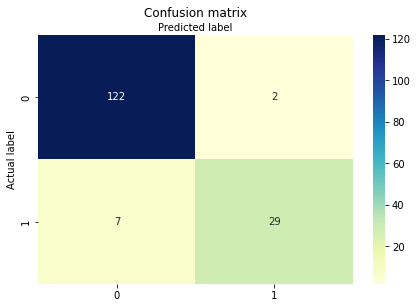

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create confusion matrix via sns heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [126]:
# print 10 random true and predicted responses
print('True', y_test.values[0:11])
print('Pred', y_pred_class[0:11])

True [0 1 0 0 0 0 0 0 0 0 1]
Pred [0 1 0 0 0 0 0 0 0 0 1]


In [127]:
# Compute evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
print("Precision:",metrics.precision_score(y_test, y_predict))
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.94375
Precision: 0.9354838709677419
Recall: 0.8055555555555556


In [128]:
#f1 score
from sklearn import metrics

print("F1 Score: %2f" % metrics.f1_score(y_test, y_predict))

F1 Score: 0.865672


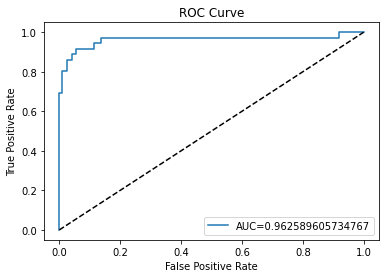

In [129]:
#plot ROC curve  

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], "k--")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [52]:
#calculate AUC score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)
auc

0.9710550887021474

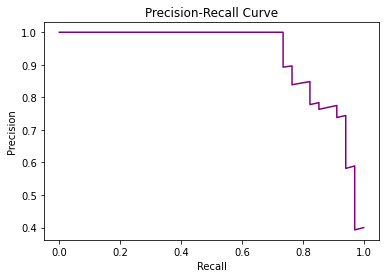

In [53]:
#http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [54]:
from sklearn.metrics import average_precision_score

round(average_precision_score(y_test, y_pred_proba), 2)


0.93

In [55]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

thresholds

array([0.01605149, 0.01688796, 0.01745092, 0.01788891, 0.02203311,
       0.02336585, 0.02496742, 0.02551952, 0.03067739, 0.03194789,
       0.03328638, 0.03518345, 0.04111642, 0.04195005, 0.0529069 ,
       0.05712645, 0.05749762, 0.06065557, 0.06749697, 0.07392911,
       0.0757285 , 0.08759624, 0.09446103, 0.09877054, 0.10181973,
       0.1144622 , 0.11954688, 0.12513238, 0.12550848, 0.14836703,
       0.14890309, 0.1499794 , 0.1593457 , 0.16807234, 0.18855333,
       0.20533421, 0.2191172 , 0.23530655, 0.26910068, 0.28697357,
       0.31188613, 0.33062757, 0.35184605, 0.3804168 , 0.38087061,
       0.43023354, 0.45170938, 0.46784234, 0.5096738 , 0.54389613,
       0.55790824, 0.56328464, 0.57653327, 0.60660291, 0.6160078 ,
       0.64496494, 0.67018042, 0.72706088, 0.78206556, 0.79246878,
       0.81008286, 0.8171124 , 0.83819426, 0.85847491, 0.86087474,
       0.90012621, 0.90871131, 0.94757024, 0.95935281, 0.97125533,
       0.97689156, 0.97701534, 0.984096  , 0.98426256, 0.98463

In [56]:
thresholds

array([0.01605149, 0.01688796, 0.01745092, 0.01788891, 0.02203311,
       0.02336585, 0.02496742, 0.02551952, 0.03067739, 0.03194789,
       0.03328638, 0.03518345, 0.04111642, 0.04195005, 0.0529069 ,
       0.05712645, 0.05749762, 0.06065557, 0.06749697, 0.07392911,
       0.0757285 , 0.08759624, 0.09446103, 0.09877054, 0.10181973,
       0.1144622 , 0.11954688, 0.12513238, 0.12550848, 0.14836703,
       0.14890309, 0.1499794 , 0.1593457 , 0.16807234, 0.18855333,
       0.20533421, 0.2191172 , 0.23530655, 0.26910068, 0.28697357,
       0.31188613, 0.33062757, 0.35184605, 0.3804168 , 0.38087061,
       0.43023354, 0.45170938, 0.46784234, 0.5096738 , 0.54389613,
       0.55790824, 0.56328464, 0.57653327, 0.60660291, 0.6160078 ,
       0.64496494, 0.67018042, 0.72706088, 0.78206556, 0.79246878,
       0.81008286, 0.8171124 , 0.83819426, 0.85847491, 0.86087474,
       0.90012621, 0.90871131, 0.94757024, 0.95935281, 0.97125533,
       0.97689156, 0.97701534, 0.984096  , 0.98426256, 0.98463

In [57]:
from sklearn.metrics import balanced_accuracy_score

threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

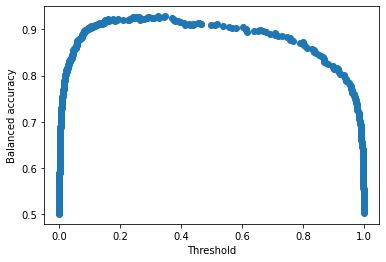

In [58]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

#Oversampling / Imbalanced Class


In [ ]:
#instantiate the the classifier with weighted classes

model = LogisticRegression(random_state=0, class_weight='balanced')

In [ ]:
#oversampling


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X, y)

  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 161
Before OverSampling, counts of label '0': 479 

After OverSampling, the shape of train_X: (1200, 58)
After OverSampling, the shape of train_y: (1200,) 

After OverSampling, counts of label '1': 600
After OverSampling, counts of label '0': 600


In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)


# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.24      1.00      0.39        39

    accuracy                           0.24       160
   macro avg       0.12      0.50      0.20       160
weighted avg       0.06      0.24      0.10       160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
leads_majority = data4[data4.Customer==0]
leads_minority = data4[data4.Customer==1]

In [ ]:
leads_minority_upsampled = resample(leads_minority, 
                                    replace=True,
                                    n_samples=600,
                                    random_state=123)

In [ ]:
leads_upsampled = pd.concat([leads_majority, leads_minority_upsampled])

leads_upsampled.Customer.value_counts()

1    600
0    600
Name: Customer, dtype: int64

In [ ]:
b = leads_upsampled.Customer
A = leads_upsampled.drop('Customer', axis = 1)

clf_0 = LogisticRegression().fit(A, b)

pred_y_0 = clf_0.predict(A)

In [ ]:
#instantiate the the classifier with weighted classes

model = LogisticRegression(random_state=0, class_weight='balanced')

# Model Tuning (adjusting threshold)

Text(0, 0.5, 'Frequency')

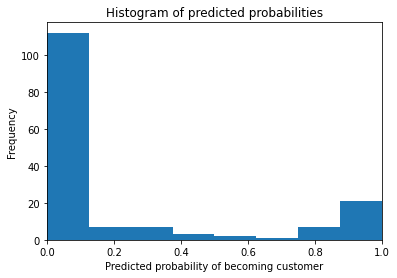

In [130]:
import matplotlib.pyplot as plt

#histogram of predicted probabilities

#8 bins
plt.hist(y_pred_proba, bins=8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of becoming customer')
plt.ylabel('Frequency')

https://www.infinitycodex.in/how-to-find-optimal-threshold-value-and



In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, classification_report

model2 = LogisticRegression(random_state=0, class_weight='balanced')
model2.fit(X_train, y_train)

THRESHOLD = 0.40
preds = np.where(model2.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

print("Accuracy:", metrics.accuracy_score(y_test, preds))
print("Precision:", metrics.precision_score(y_test, preds))
print("Recall:", metrics.recall_score(y_test, preds))
print("F1 Score: %2f" % metrics.f1_score(y_test, preds))

print()

Accuracy: 0.93125
Precision: 0.8048780487804879
Recall: 0.9166666666666666
F1 Score: 0.857143



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [132]:
print(metrics.roc_auc_score(y_test, preds))

0.9260752688172043


In [133]:
print(confusion_matrix(y_test,preds))


[[116   8]
 [  3  33]]


# Feature Importance


A negative coefficient means that higher value of the corresponding feature pushes the classification more towards the negative class

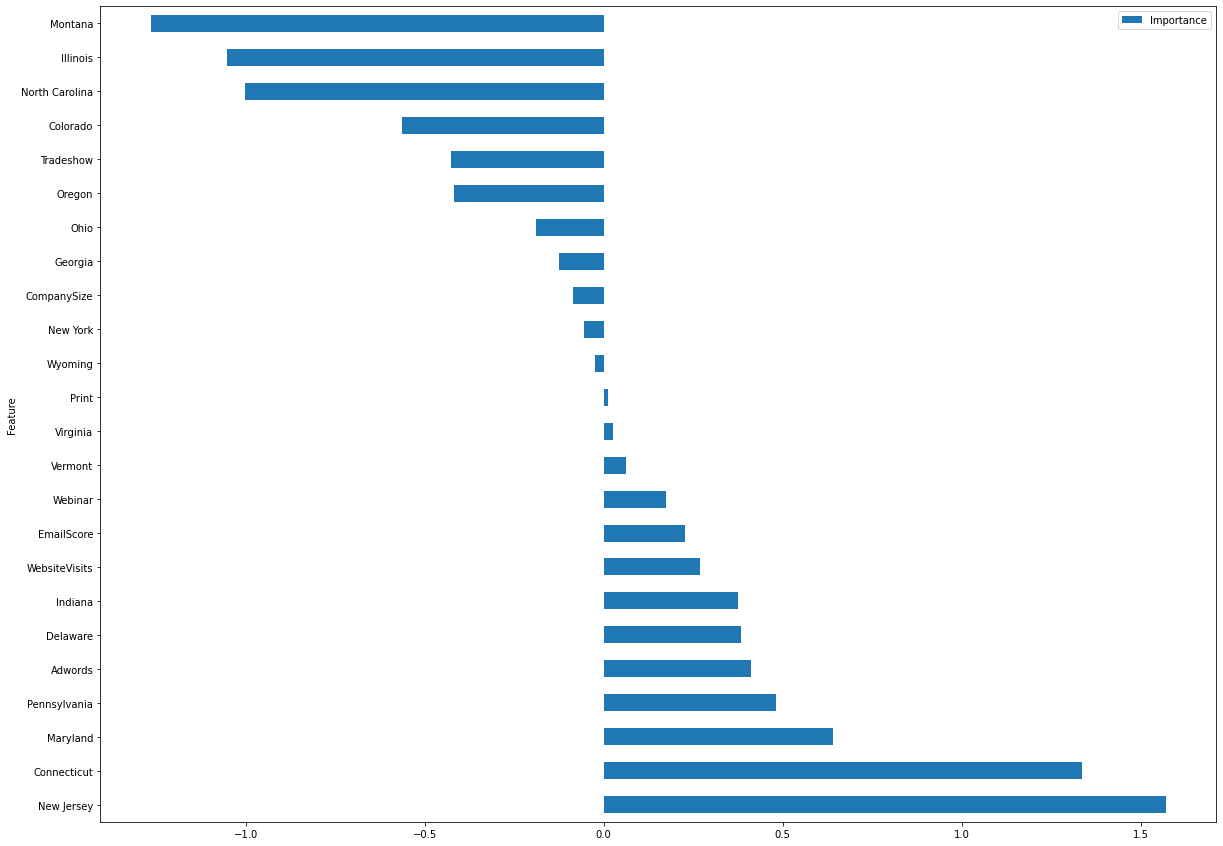

In [134]:
#https://sefiks.com/2021/01/06/feature-importance-in-logistic-regression/

feature_names = ['CompanySize', 'WebsiteVisits', 'EmailScore', 'Adwords', 'Print', 'Tradeshow', 'Webinar', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Indiana', 'Maryland', 'Montana', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Vermont', 'Virginia', 'Wyoming']

feature_importance = pd.DataFrame(feature_names, columns = ["Feature"])
feature_importance["Importance"] = model2.coef_[0]
feature_importance = feature_importance.sort_values(by = ["Importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='Feature', y='Importance', figsize=(20,15))
plt.show()

In [135]:
print(feature_importance)

           Feature  Importance
15      New Jersey    1.569070
8      Connecticut    1.334573
13        Maryland    0.639734
20    Pennsylvania    0.479966
3          Adwords    0.411433
9         Delaware    0.382895
12         Indiana    0.373630
1    WebsiteVisits    0.268829
2       EmailScore    0.226609
6          Webinar    0.174208
21         Vermont    0.061402
22        Virginia    0.025771
4            Print    0.012281
23         Wyoming   -0.024990
16        New York   -0.054008
0      CompanySize   -0.085444
10         Georgia   -0.125823
18            Ohio   -0.190021
19          Oregon   -0.419282
5        Tradeshow   -0.426111
7         Colorado   -0.562494
17  North Carolina   -1.001184
11        Illinois   -1.053188
14         Montana   -1.264241


In [136]:
print('Top positive features')
print(feature_importance[feature_importance.Importance > .32])

print()
print('Top negative features')
print(feature_importance[feature_importance.Importance < -.32])

Top positive features
         Feature  Importance
15    New Jersey    1.569070
8    Connecticut    1.334573
13      Maryland    0.639734
20  Pennsylvania    0.479966
3        Adwords    0.411433
9       Delaware    0.382895
12       Indiana    0.373630

Top negative features
           Feature  Importance
19          Oregon   -0.419282
5        Tradeshow   -0.426111
7         Colorado   -0.562494
17  North Carolina   -1.001184
11        Illinois   -1.053188
14         Montana   -1.264241


# Delivery of Model

In [137]:
#Creating an influx of new leads to put the model into practice 

New_observations = [[99, 10, 34, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
                    [120, 11, 17, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                    [115, 14, 20, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                    [77, 8, 14, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [138]:
#append lead score to new leads and sort by lead score

new_leads = pd.DataFrame(New_observations, columns = ['Company Size', 'Website Visits', 'Email Score', 'Adwords', 'Print', 'Tradeshow', 'Webinar', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Indiana', 'Maryland', 'Montana', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Vermont', 'Virginia', 'Wyoming'])

new_leads['Lead Score'] = model2.predict_proba(New_observations)[::,1]
new_leads['Name'] = ['Bob Vance of Vance Refrigeration', 'Larry Meyers', 'Lackawanna County', 'Aaron Grandy']
new_leads.drop(['Adwords', 'Print', 'Tradeshow', 'Webinar', 'Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Illinois', 'Indiana', 'Maryland', 'Montana', 'New Jersey', 'New York', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Vermont', 'Virginia', 'Wyoming'], axis=1)
new_leads_column_names = ["Name", "Lead Score", "Company Size", "Website Visits", "Email Score"]

new_leads = new_leads.reindex(columns=new_leads_column_names)

new_leads.sort_values(by='Lead Score', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Name,Lead Score,Company Size,Website Visits,Email Score
0,Bob Vance of Vance Refrigeration,0.984001,99,10,34
3,Aaron Grandy,0.716885,77,8,14
2,Lackawanna County,0.189093,115,14,20
1,Larry Meyers,0.074987,120,11,17


In [476]:
model2.predict(New_observations)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1, 0, 0, 1])

# Extra/ Test Code


**hyperparameters**

each algorithm has its own specific hyperparameters

Hyperparameters: cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

**Choose the optimal hyperparemeters that lead to the best performance**

In [ ]:
  def threshold_from_optimal_f_score(self, X, y):
        y_scores = LogisticRegression.predict_proba(self, X)[:, 1]
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)

        fscores = (2 * precisions * recalls) / (precisions + recalls)
        
        optimal_idx = np.argmax(fscores)
        
        return thresholds[optimal_idx], fscores[optimal_idx]

In [ ]:
lrt = LogisticRegressionWithThreshold()
lrt.fit(X_train, y_train)

threshold, optimal_f1_score = lrt.threshold_from_optimal_f_score(X_train, y_train)
y_pred = lrt.predict(X_train, threshold)

threshold, optimal_f1_score

NameError: ignored

**Gridsearch CV**

In GridSearchCV approach (a brutesearch approach), machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

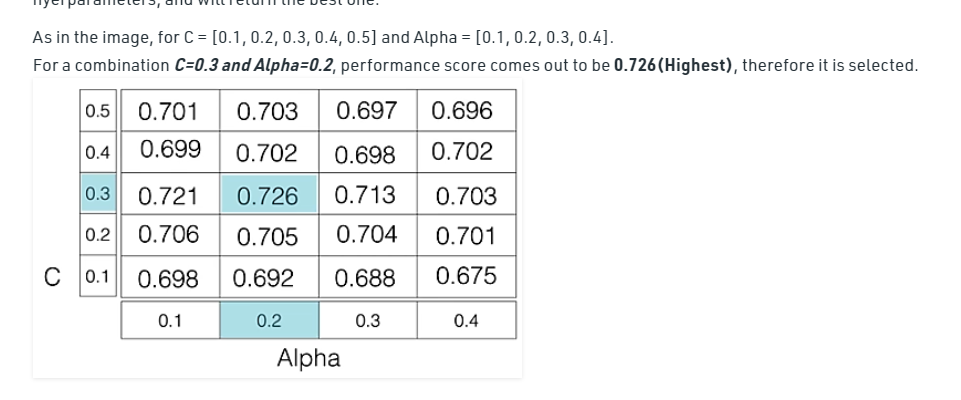

The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination.

In [ ]:
from sklearn.model_selection import GridSearchCV

#build the array / hyperparameter grid based on the certain hyperparemeter, in this instance "n_estimators"
param_grid = {'n_estimators': np.arange(10,51)}

# Call GridSearch CV; returns an object you can fit to the data with GridsearchCV
clf_cv = GridsearchCV(logisticregression, param_grid)

#fit it to data
clf_cv.fit(X, y)

#retrieve optimal combo
print(clf_cv.best_params_)

#see the score of the model with this hyperparameter
clf_cv.best_score_

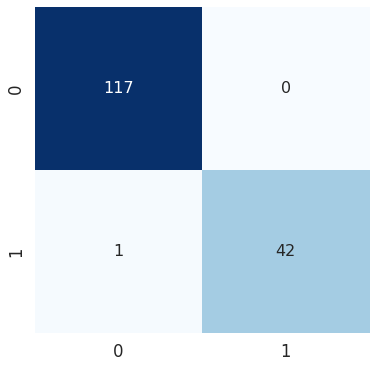

In [ ]:
#showcase confusion matrix

# Function to create a confusion matrix 
def conf_matrix(y_test, y_predict):    
    
    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, y_predict)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    
#Calling function 
conf_matrix(y_test, y_predict)

**BROKE UP THE GOOD EXAMPLE ABOVE INTO PARTS BELOW**

In [ ]:
#load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Import Logistic regression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
model = LogisticRegression()

In [ ]:
#instantiate the the classifier with weighted classes

model = LogisticRegression(random_state=0, class_weight='balanced')

In [ ]:
#create feature/input variable(s)
X = data3.drop('Customer', axis=1)

#create target variable
y = data3['Customer']

In [ ]:
from sklearn.model_selection import train_test_split

#create training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#fit to training data
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(class_weight='balanced', random_state=0)

In [ ]:
#make predictions
model.predict(X_test)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0])

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
#generating probabilities in sklearn

model.predict_proba(X_test)[:,1]


array([1.00000000e+00, 1.61810324e-18, 6.22995886e-11, 6.76558107e-19,
       9.77886662e-01, 2.27162520e-10, 2.65865893e-03, 6.09098867e-06,
       1.00000000e+00, 1.03508966e-05, 1.00766469e-13, 1.21574797e-05,
       1.98502265e-16, 3.91622380e-11, 2.61877543e-15, 4.12212000e-10,
       3.71683567e-13, 1.92484982e-12, 2.08835116e-17, 1.01914299e-08,
       2.07735975e-19, 3.78954999e-18, 1.07245576e-07, 1.00000000e+00,
       4.04549208e-16, 1.00000000e+00, 1.42287013e-05, 1.15774639e-14,
       9.04817398e-15, 2.52326640e-04, 1.57460655e-19, 9.99986148e-01,
       1.56093969e-04, 1.03129294e-07, 1.00000000e+00, 8.75130551e-10,
       1.00491947e-11, 1.66766721e-20, 1.00076436e-07, 1.21207261e-05,
       4.66064233e-11, 1.00000000e+00, 6.43951919e-12, 1.00000000e+00,
       1.51051287e-19, 2.84127738e-13, 1.46146977e-15, 3.43957839e-16,
       1.72572516e-13, 9.99999858e-01, 9.99999840e-01, 1.00000000e+00,
       9.98697507e-01, 1.58281989e-07, 7.48504238e-08, 7.77517250e-12,
      

In [ ]:
#compute model accuracy 

model.score(X_train, y_train)
print(model.score(X_test, y_test))

1.0


In [ ]:
#print classification report 

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        32

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



**FIT SIMPLE MODEL #2**

In [ ]:
#load contents from Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instantiate the classifier
model = LogisticRegression()

#convert to binary
data2['Customer'] = data2['Customer'].replace({'Yes' : 1, 'No': 0})

#create feature/input variable(s)
X = data2.drop(['Customer', 'ID', 'PhoneNumber', 'LeadSource', 'State' ] , axis=1)

#create target variable
y = leads['Customer']

In [ ]:
#create training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#fit to training data
model.fit(X_train, y_train)

#make predictions
y_predict = model.predict(X_test)

y_predict

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 

In [ ]:
#generating probabilities in sklearn
model.predict_proba(X_test)[:,1]

#compute model accuracy 
model.score(X_train, y_train)
print(model.score(X_test, y_test))

0.99375


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

print(cm)

[[110   0]
 [  1  49]]


In [ ]:
from sklearn import metrics

auc_score = metrics.roc_auc_score(y_test, y_predict)

print("AUC Score:","{:.2f}".format(auc_score))

ValueError: ignored

**Feature Scaling**

Standardization - centers the distribution around the mean, calculates the number of stadard deviations way from the mean each point is

In [ ]:
data.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [ ]:
from sklearn.preprocessing import StandardScaler

data_scaled = StandardScaler().fit_transform(data)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       117
           1       0.00      0.00      0.00        43

    accuracy                           0.73       160
   macro avg       0.37      0.50      0.42       160
weighted avg       0.53      0.73      0.62       160



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


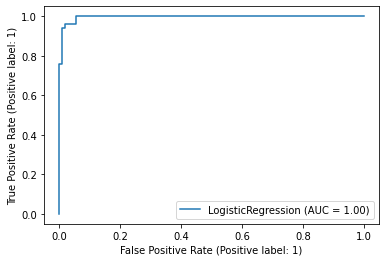

In [ ]:
metrics.plot_roc_curve(model,X_test, y_test)

In [ ]:

clf.fit(features,leads['Customer'])
 
feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[abs(i) for i in clf.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)
 
#if you don't want the absolute value
#feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[i for i in model.coef_[0]]})
#feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
2,Print,1.015622
1,WebsiteVisits,0.231305
0,CompanySize,0.135410


In [ ]:
#https://www.youtube.com/watch?v=uTrS5nXnzZ8

# Feature Importance
plot_model(best_model, plot = 'feature')


# AUC Plot
plot_model(best_model, plot = 'auc')

NameError: ignored

In [ ]:
def get_feature_importance(model, feature_names):
  feature_importance = (
      pd.DataFrame(
          {
              'variable': feature_names, #feature names
           'coefficient':model.coef_[0] # feature coef
           }
      )
      .round(decimals=2) \
      .sort_values('coefficient',ascending=False) \
      .style.bar(color=['read','greaen'], align='zero')

  )
  return feature_importance

In [ ]:
get_feature_importance(model, X_train.columns)

ValueError: ignored

In [ ]:
dict(zip(leads.columns, clf.coef_[0]))

{'Adwords': -0.7861118027760264,
 'Alabama': -0.2379194353313747,
 'Alaska': 0.17362854082179707,
 'Arizona': 0.09197157491761304,
 'Arkansas': 0.764635634773775,
 'California': -0.022535137627348628,
 'Colorado': 1.868091962976355,
 'CompanySize': -0.13388979539303472,
 'Connecticut': 1.054443702589907,
 'Customer': 0.6659808217779407,
 'Delaware': -0.5772440425173901,
 'EmailScore': 0.22277034859692438,
 'Florida': 0.4151196287665127,
 'Georgia': -0.17587976003478198,
 'Hawaii': 0.01837891292982315,
 'Idaho': -0.6400347525534746,
 'Illinois': 0.9791601493185923,
 'Indiana': -0.014760553693792738,
 'Iowa': -0.5009884508984265,
 'Kansas': -0.04357455051325115,
 'Kentucky': -0.7890126408048073,
 'Louisiana': -0.1227010286101562,
 'Maine': 1.6366951002930419,
 'Maryland': -0.37862600040878513,
 'Massachussets': -0.14377107247116147,
 'Michigan': -0.07751972367491683,
 'Minnesota': -0.24680734209757543,
 'Mississippi': -0.40566250223833406,
 'Missouri': -0.2987444305405718,
 'Montana': -0

**Approach #1**

In [ ]:
#https://machinelearningmastery.com/calculate-feature-importance-with-python/

import sklearn
print(sklearn.__version__)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

1.0.1


In [ ]:
print(leads.columns.values.tolist())

['CompanySize', 'WebsiteVisits', 'EmailScore', 'Customer', 'Adwords', 'Print', 'Tradeshow', 'Webinar', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachussets', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [ ]:
#get importance
importance = clf.coef_[0]

#summarize importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.13389
Feature: 1, Score: 0.22910
Feature: 2, Score: 0.22277
Feature: 3, Score: 0.66598
Feature: 4, Score: -0.78611
Feature: 5, Score: 0.22784
Feature: 6, Score: 0.57478
Feature: 7, Score: -0.18766
Feature: 8, Score: -0.23792
Feature: 9, Score: 0.17363
Feature: 10, Score: 0.09197
Feature: 11, Score: 0.76464
Feature: 12, Score: -0.02254
Feature: 13, Score: 1.86809
Feature: 14, Score: 1.05444
Feature: 15, Score: -0.57724
Feature: 16, Score: 0.41512
Feature: 17, Score: -0.17588
Feature: 18, Score: 0.01838
Feature: 19, Score: -0.64003
Feature: 20, Score: 0.97916
Feature: 21, Score: -0.01476
Feature: 22, Score: -0.50099
Feature: 23, Score: -0.04357
Feature: 24, Score: -0.78901
Feature: 25, Score: -0.12270
Feature: 26, Score: 1.63670
Feature: 27, Score: -0.37863
Feature: 28, Score: -0.14377
Feature: 29, Score: -0.07752
Feature: 30, Score: -0.24681
Feature: 31, Score: -0.40566
Feature: 32, Score: -0.29874
Feature: 33, Score: -0.41861
Feature: 34, Score: -0.34538
Feature: 

In [ ]:
#https://stackoverflow.com/questions/34052115/how-to-find-the-importance-of-the-features-for-a-logistic-regression-model

print(clf.coef_)

[[-1.33889795e-01  2.29096784e-01  2.22770349e-01  6.65980822e-01
  -7.86111803e-01  2.27835642e-01  5.74778766e-01 -1.87658863e-01
  -2.37919435e-01  1.73628541e-01  9.19715749e-02  7.64635635e-01
  -2.25351376e-02  1.86809196e+00  1.05444370e+00 -5.77244043e-01
   4.15119629e-01 -1.75879760e-01  1.83789129e-02 -6.40034753e-01
   9.79160149e-01 -1.47605537e-02 -5.00988451e-01 -4.35745505e-02
  -7.89012641e-01 -1.22701029e-01  1.63669510e+00 -3.78626000e-01
  -1.43771072e-01 -7.75197237e-02 -2.46807342e-01 -4.05662502e-01
  -2.98744431e-01 -4.18607955e-01 -3.45378186e-01 -1.10685466e-01
   2.00745599e+00 -2.84354540e-01  1.18296390e+00 -4.80031512e-01
  -1.93026702e-02  5.55866679e-01 -5.55735084e-01 -3.43811845e-01
   3.13977528e-01 -7.40605710e-01 -1.46141652e-01 -4.39658200e-01
  -6.20258432e-01 -1.17365965e-01  1.13153468e-01 -2.73052792e-01
   9.97052674e-03 -6.63049787e-01  3.71513783e-04 -7.80724886e-02
  -3.84881829e-03]]


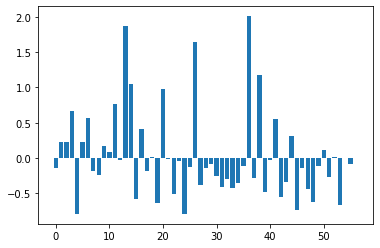

In [ ]:
#plot importance

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [432]:
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.98      0.91      0.94       122
           1       0.77      0.95      0.85        38

    accuracy                           0.92       160
   macro avg       0.87      0.93      0.90       160
weighted avg       0.93      0.92      0.92       160

